In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection

In [2]:
#pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df.shape

(13611, 17)

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])
y=df['Class']
df.drop(columns=['Class'],inplace=True)
df.drop(columns=['Area','AspectRation','Eccentricity'],inplace=True)
#df.drop(columns=['Area','AspectRation','Eccentricity','ShapeFactor2'],inplace=True)

# Entropy & Gini

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.values,y,test_size=0.3)

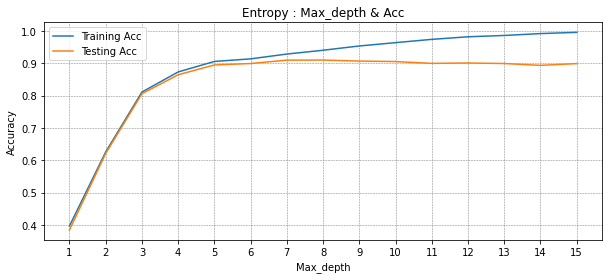

In [7]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=x) 
    dtc.fit(x_train,y_train)
    train_z = dtc.predict(x_train)
    test_z = dtc.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train, train_z))
    test_acc.append(metrics.accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.figure(figsize=(10,4))
plt.xticks(range(16))  # 設定x刻度
plt.title('Entropy : Max_depth & Acc')
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(x, train_acc, label='Training Acc') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Acc') # Plot testing error over domain
plt.xlabel('Max_depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend(loc = 'upper left')
plt.show()

In [8]:
connect={"Entropy_Train_Acc": train_acc, "Entropy_Test_Acc": test_acc}
pd.DataFrame(connect,index=list(range(1,16)))

,Entropy_Train_Acc,Entropy_Test_Acc
1,0.396452,0.384182
2,0.625695,0.620960
3,0.811063,0.805828
4,0.873307,0.864594
5,0.905847,0.894956
6,0.913824,0.899363
7,0.928729,0.909892
8,0.940485,0.910137
9,0.953711,0.906954
10,0.963997,0.905485


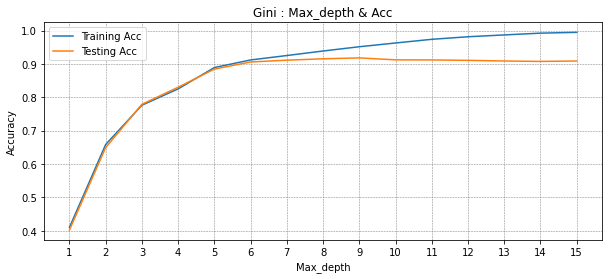

In [9]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(criterion='gini',max_depth=x) 
    dtc.fit(x_train,y_train)
    train_z = dtc.predict(x_train)
    test_z = dtc.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train, train_z))
    test_acc.append(metrics.accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.figure(figsize=(10,4))
plt.xticks(range(16))  # 設定x刻度
plt.title('Gini : Max_depth & Acc')
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(x, train_acc, label='Training Acc') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Acc') # Plot testing error over domain
plt.xlabel('Max_depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend(loc = 'upper left')
plt.show()

In [10]:
connect={"Gini_Train_Acc": train_acc, "Gini_Test_Acc": test_acc}
pd.DataFrame(connect,index=list(range(1,16)))

,Gini_Train_Acc,Gini_Test_Acc
1,0.410203,0.402302
2,0.658549,0.649363
3,0.776215,0.778893
4,0.825129,0.830069
5,0.889052,0.884427
6,0.911830,0.905730
7,0.925055,0.911117
8,0.938596,0.915279
9,0.951401,0.917973
10,0.962633,0.912096


# Model

In [11]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=9)
clf.fit(x_train,y_train) #(X_scaled,y_train)

DecisionTreeClassifier(max_depth=9)

In [12]:
clf_score=clf.feature_importances_
connect={"Columns": df.columns, "DC_Score": clf_score}
pd.DataFrame(connect).sort_values(by=['DC_Score'], ascending=False)

,Columns,DC_Score
11,ShapeFactor3,0.212405
9,ShapeFactor1,0.205587
1,MajorAxisLength,0.196707
0,Perimeter,0.161979
4,EquivDiameter,0.071970
7,roundness,0.060995
8,Compactness,0.025931
12,ShapeFactor4,0.022697
2,MinorAxisLength,0.016528
6,Solidity,0.009830


In [13]:
x_predict=clf.predict(x_test)
x_acc=metrics.accuracy_score(y_train,clf.predict(x_train))
x_acc2=metrics.accuracy_score(y_test,clf.predict(x_test))
print("Train Score:",x_acc)
print("Test Score :",x_acc2)

Train Score: 0.951296315734229
Test Score : 0.9167482859941234


In [46]:
import pydotplus
import os
from sklearn.tree import export_graphviz

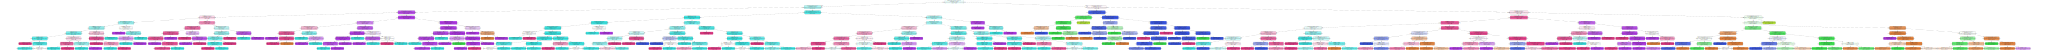

In [65]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\\bin'
#視覺化
dot_data = export_graphviz(clf, out_file=None, label='all', impurity=False, proportion=True, feature_names=df.columns, class_names=['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz' , 'Sira'],filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph